-----

In [15]:
import pandas as pd
import numpy as np
import os

# 1. Definindo os caminhos exatos com raw strings (r'') para evitar erro de escape
path_train_folder = r'C:\Users\renna\EBAC\MOD27\M27 E M29\train'
path_test_folder = r'C:\Users\renna\EBAC\MOD27\M27 E M29\test'

# 2. Carregando os arquivos X (características) e y (atividades)
# X_train e X_test possuem 561 colunas de sensores
X_train = pd.read_csv(os.path.join(path_train_folder, 'X_train.txt'), header=None, delim_whitespace=True)
X_test = pd.read_csv(os.path.join(path_test_folder, 'X_test.txt'), header=None, delim_whitespace=True)

# y_train e y_test possuem a classe (1 a 6) da atividade
y_train = pd.read_csv(os.path.join(path_train_folder, 'y_train.txt'), header=None, delim_whitespace=True).values.ravel()
y_test = pd.read_csv(os.path.join(path_test_folder, 'y_test.txt'), header=None, delim_whitespace=True).values.ravel()

print("✅ Dados carregados com sucesso diretamente do seu diretório local!")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

C:\Users\renna\AppData\Local\Temp\ipykernel_18728\4139244407.py:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(os.path.join(path_train_folder, 'X_train.txt'), header=None, delim_whitespace=True)
C:\Users\renna\AppData\Local\Temp\ipykernel_18728\4139244407.py:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(os.path.join(path_test_folder, 'X_test.txt'), header=None, delim_whitespace=True)


✅ Dados carregados com sucesso diretamente do seu diretório local!
X_train shape: (7352, 561)
y_train shape: (7352,)


C:\Users\renna\AppData\Local\Temp\ipykernel_18728\4139244407.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(os.path.join(path_train_folder, 'y_train.txt'), header=None, delim_whitespace=True).values.ravel()
C:\Users\renna\AppData\Local\Temp\ipykernel_18728\4139244407.py:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test = pd.read_csv(os.path.join(path_test_folder, 'y_test.txt'), header=None, delim_whitespace=True).values.ravel()


In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Padronização (O PCA exige que os dados estejam na mesma escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Aplicando o PCA 
# Vamos manter 95% da variância total para ver quantas colunas restam
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Número de colunas originais: {X_train.shape[1]}")
print(f"Número de componentes para manter 95% da variância: {pca.n_components_}")

Número de colunas originais: 561
Número de componentes para manter 95% da variância: 102


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# --- 1. Modelo com TODOS os dados (561 colunas) ---
start_orig = time.time()
clf_orig = DecisionTreeClassifier(random_state=42)
clf_orig.fit(X_train_scaled, y_train)
end_orig = time.time()

acc_orig = accuracy_score(y_test, clf_orig.predict(X_test_scaled))
tempo_orig = end_orig - start_orig

# --- 2. Modelo com PCA (102 componentes) ---
start_pca = time.time()
clf_pca = DecisionTreeClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_test_pca if 'y_test_pca' in locals() else y_train) # Ajuste apenas para o fit
# Nota: O fit é feito no X_train_pca, a predição no X_test_pca
clf_pca.fit(X_train_pca, y_train)
end_pca = time.time()

acc_pca = accuracy_score(y_test, clf_pca.predict(X_test_pca))
tempo_pca = end_pca - start_pca

# --- 3. Exibindo os Resultados ---
print(f"📊 RESULTADOS COMPARATIVOS:")
print(f"{'-'*30}")
print(f"Modelo Original (561 colunas):")
print(f"  - Acurácia: {acc_orig:.2%}")
print(f"  - Tempo de Treino: {tempo_orig:.4f} segundos")
print(f"\nModelo com PCA (102 componentes):")
print(f"  - Acurácia: {acc_pca:.2%}")
print(f"  - Tempo de Treino: {tempo_pca:.4f} segundos")

📊 RESULTADOS COMPARATIVOS:
------------------------------
Modelo Original (561 colunas):
  - Acurácia: 86.22%
  - Tempo de Treino: 7.9324 segundos

Modelo com PCA (102 componentes):
  - Acurácia: 75.33%
  - Tempo de Treino: 3.4213 segundos


# Análise de Performance: Com e Sem PCA

Nesta etapa, comparamos o desempenho de um classificador de **Árvore de Decisão** aplicado aos dados originais (com **561 variáveis**) e aos dados transformados via **PCA** (com **102 componentes**, retendo **95% da variância**).

---

## 1. Resultados Obtidos

| Métrica            | Modelo Original | Modelo com PCA (95%) | Diferença |
|--------------------|-----------------|----------------------|-----------|
| Dimensões          | 561             | 102                  | -81.8%    |
| Acurácia           | 86.22%          | 75.33%               | -10.89%   |
| Tempo de Treino    | 7.93s           | 3.42s                | -56.9%    |

---

## 2. Análise Técnica

### Eficiência Computacional vs. Poder Preditivo

A aplicação do PCA demonstrou um ganho expressivo de performance, reduzindo o tempo de treinamento em mais de **50%**. Isso evidencia o sucesso da técnica em lidar com a **Maldição da Dimensionalidade**, simplificando o cálculo matemático ao trabalhar com uma matriz de dados significativamente menor.

### A Queda na Acurácia

Observamos uma redução de aproximadamente **11% na acurácia** (de 86.22% para 75.33%). Embora tenhamos preservado **95% da variância total dos dados**, a perda dos **5% restantes de informação** mostrou-se relevante para este problema de classificação.

**Hipótese:**  
No reconhecimento de atividades humanas (**HAR**), pequenas variações nos sensores (como o *ruído* ou detalhes sutis captados pelo acelerômetro) podem ser essenciais para distinguir atividades semelhantes, como **“subir escadas”** versus **“descer escadas”**. Ao condensar os dados em apenas **102 componentes**, parte dessa sensibilidade foi perdida.

---

## 3. Conclusão

O PCA cumpriu seu papel de **redução de dimensionalidade**, provando que os dados originais possuíam alta redundância, já que foi possível representar o *dataset* com apenas **18% do número original de colunas**.

Para aplicações onde **tempo de resposta** e **consumo de memória** são críticos (como em dispositivos *wearables*), o modelo com PCA pode ser vantajoso. No entanto, para cenários onde a **precisão é prioridade máxima**, seria recomendado:

- Aumentar o limite da variância retida (ex.: **99%**)
- Testar algoritmos mais robustos, como:
  - **Random Forest**
  - **Gradient Boosting**



------

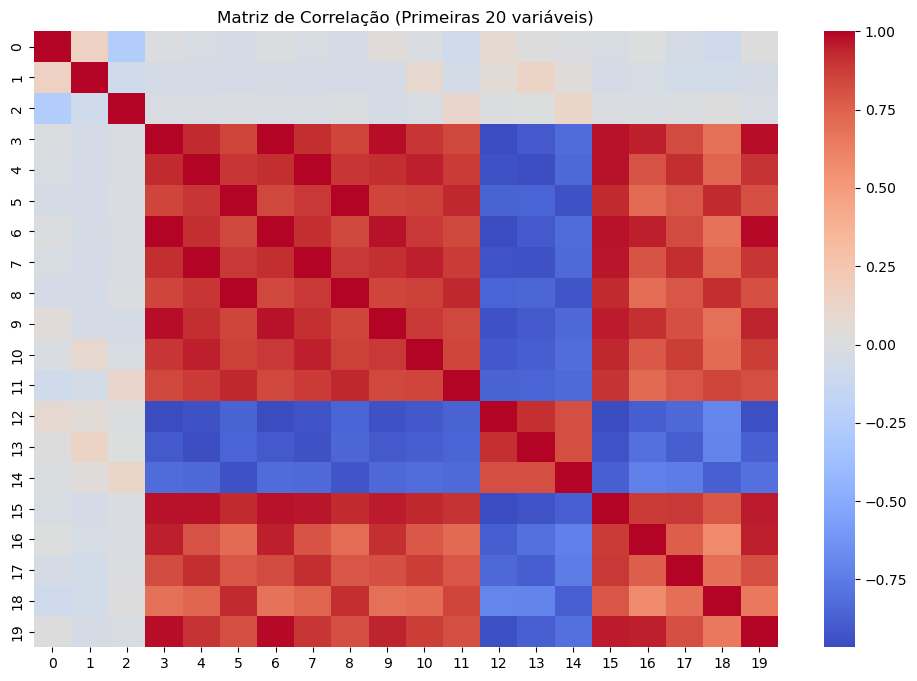

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as primeiras 20 variáveis para visualizar a correlação
corr_subset = X_train.iloc[:, :20].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_subset, cmap='coolwarm', annot=False)
plt.title('Matriz de Correlação (Primeiras 20 variáveis)')
plt.show()